In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
sys.path.insert(0, '../mvTCR')
import tcr_embedding.utils_training as utils

In [2]:
# Put the .h5ad file read below in a folder named 'data' and put the folder 'data' in the 'mvTCR' folder.
# This way you won't get an error from the utils.load_data function
adata = utils.load_data('09_tcr_annotation_A_B_with_gender_data.h5ad')
#Put the best_model_by_metric.pt file in the mvTCR folder
model = utils.load_model(adata, path_model = 'best_model_by_metric.pt')

In [3]:
adata.obs.columns

Index(['Sample', 'donor', 'organ', 'sort', 'method', 'file', 'is_TRA_p',
       'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source', 'cell types',
       'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'multi_chain',
       'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus',
       'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3',
       'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt',
       'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr',
       'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw',
       'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene',
       'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene',
       'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene',
       'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene',
       'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene',
       'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene',
       'IR_VJ_1_junction_ins', 'IR_VJ_2_ju

In [4]:
latent_moe = model.get_latent(adata, metadata=['clonotype', 'Age', 'Source', 'Sample'], return_mean=True)

In [5]:
import os
os.chdir('C:/Users/Gheorghe Pascu/OneDrive - tum.de/WiSe 21-22/Computational_Methods_in_Single_Cell_Biology/T_cell_project/') # where the folder 'data' can be found
cwd = os.getcwd()
print(cwd)

C:\Users\Gheorghe Pascu\OneDrive - tum.de\WiSe 21-22\Computational_Methods_in_Single_Cell_Biology\T_cell_project


In [6]:
path = './data/latent_moe.h5ad'
sc.write(adata=latent_moe, filename=path)

In [7]:
latent_moe.obs.columns

Index(['batch', 'clonotype', 'Age', 'Source', 'Sample'], dtype='object')

In [8]:
sc.pp.neighbors(latent_moe, use_rep='X')

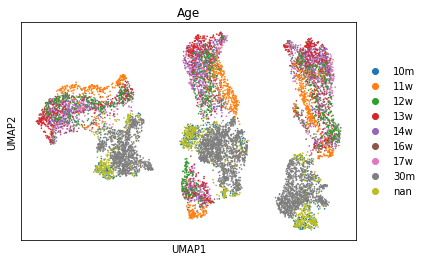

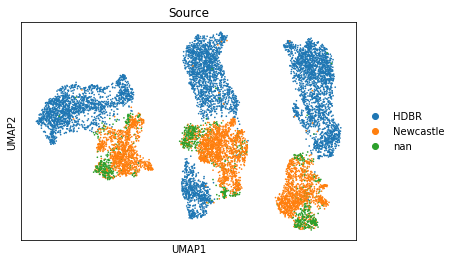

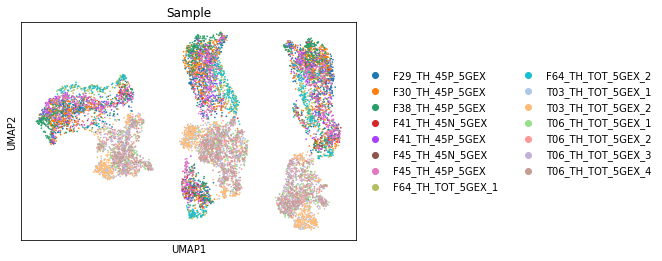

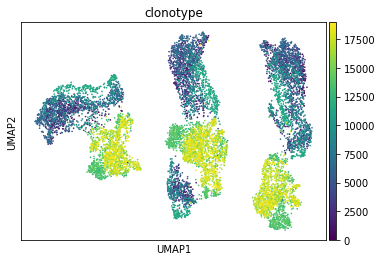

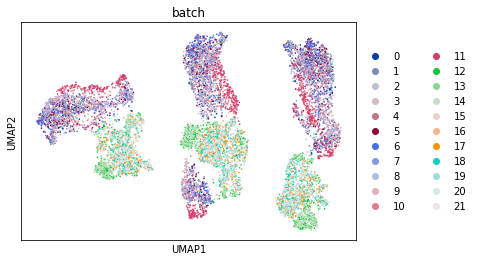

In [9]:
sc.tl.umap(latent_moe)
sc.pl.umap(latent_moe, color='Age')
sc.pl.umap(latent_moe, color='Source')
sc.pl.umap(latent_moe, color='Sample')
sc.pl.umap(latent_moe, color='clonotype')
sc.pl.umap(latent_moe, color='batch')

In [14]:
latent_moe.shape

(10954, 10)

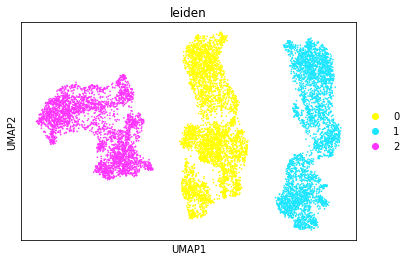

Index(['batch', 'clonotype', 'Age', 'Source', 'Sample', 'leiden'], dtype='object')

In [26]:
#sc.tl.leiden(latent_moe, resolution = 1)
sc.tl.leiden(latent_moe, resolution = 0.05)
sc.pl.umap(latent_moe, color = "leiden")
latent_moe.obs.columns

In [15]:
path_tcr_anno_A_B_with_gender = './data/09_tcr_annotation_A_B_with_gender_data.h5ad'
adata = sc.read(adata=adata, filename=path_tcr_anno_A_B_with_gender)

In [28]:
adata.obs['leiden'] = latent_moe.obs['leiden']
adata.obs.columns

Index(['Sample', 'donor', 'organ', 'sort', 'method', 'file', 'is_TRA_p',
       'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source', 'cell types',
       'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'multi_chain',
       'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus',
       'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3',
       'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt',
       'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr',
       'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw',
       'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene',
       'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene',
       'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene',
       'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene',
       'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene',
       'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene',
       'IR_VJ_1_junction_ins', 'IR_VJ_2_ju

In [41]:
sc.write(adata=adata, filename = './data/10_data_with_leiden.h5ad')

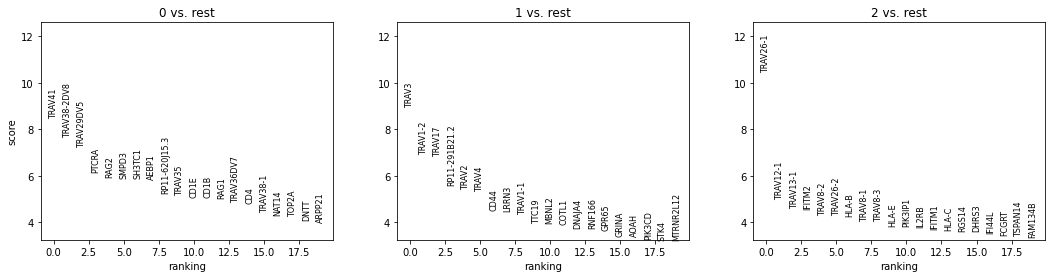

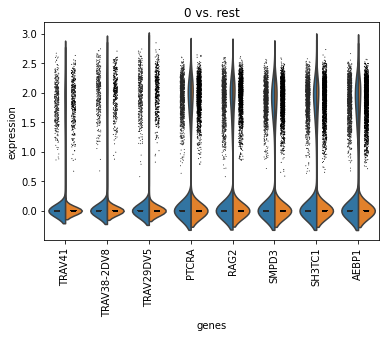

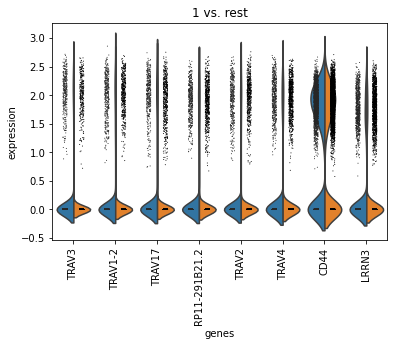

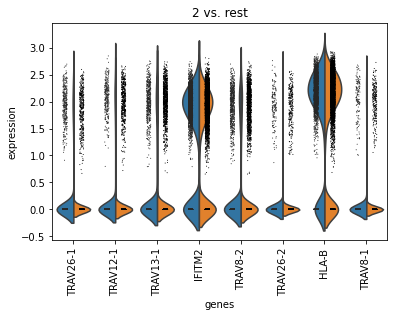

In [35]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)
sc.pl.rank_genes_groups_violin(adata, groups='1', n_genes=8)
sc.pl.rank_genes_groups_violin(adata, groups='2', n_genes=8)

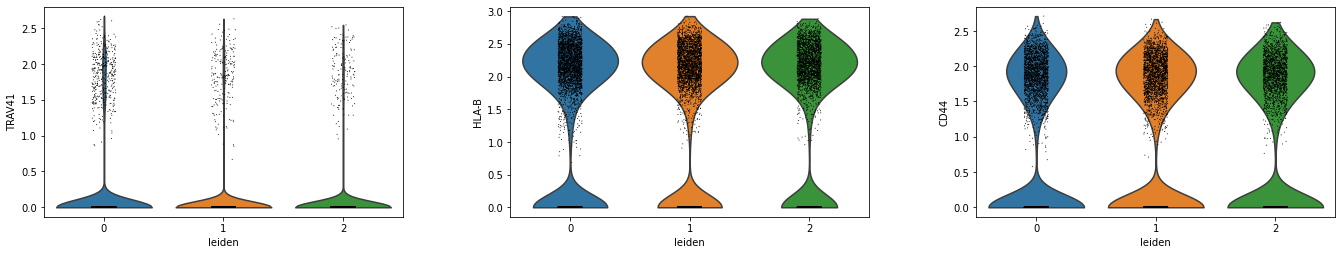

In [38]:
#Compare some genes
sc.pl.violin(adata, ['TRAV41', 'HLA-B', 'CD44'], groupby='leiden')

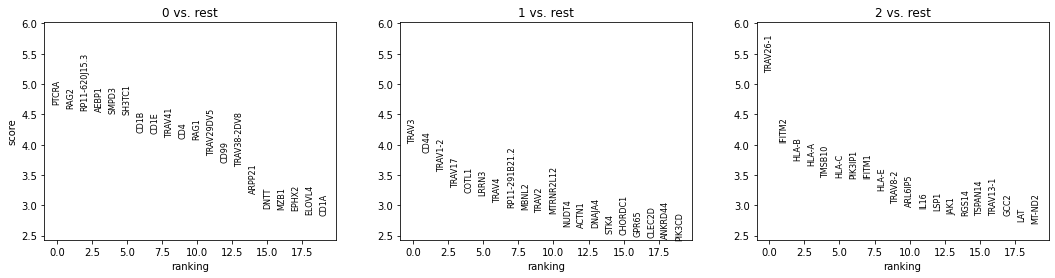

In [30]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata)

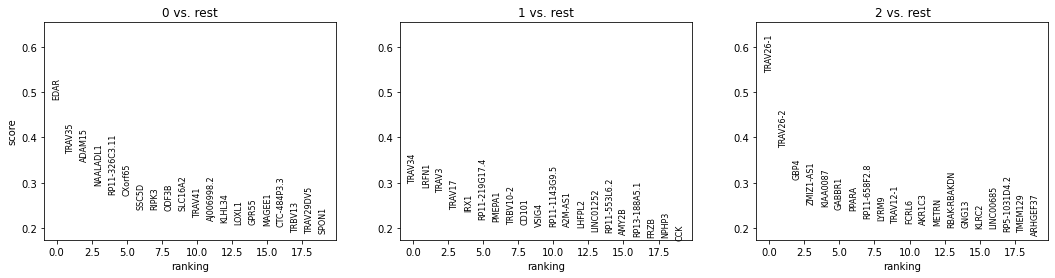

In [33]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata)